Questão 7. Obtenha no site do IBGE ou do IPEADATA as séries temporais para Consumo das
Famílias e PIB (a preços de mercado) nas Contas Nacionais Trimestrais para o período de 1991 até
o dado mais recente. Nos dois casos obtenha o Índice encadeado - dessazonalizado. De posse destas
informações produza os seguintes resultados:
a) Um gráfico com as duas séries temporais. O que você pode dizer sobre o comportamento das
duas séries?
b) Agora faça o seguinte: Aplique o filtro HP (Hodrick-Prescott) nas duas séries. Lembre-se que
pelo filtro são gerados duas séries: Yt = Y
T
t +Y
C
t
. Onde Yt é a série original retirada do IBGE

e Y
T
t
é a tendência estimada pelo filtro. O que queremos é Y
C
t ≡ Yt − Y
T
t
. Use esta série
para calcular o desvio padrão da série de consumo e de PIB e compare os resultados. O que
se pode dizer sobre a volatilidade das séries. O MATLAB, Octave, R, Python, Excel
etc possuem o filtro HP.

In [72]:
# bibliotecas usadas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

#### Importar base de dados e tratamento

In [65]:
consumo_familia = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Macroeconomia 2\consumo_familias.csv", sep=";")
pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Macroeconomia 2\pib.csv", sep=",")


<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_5264\2184923827.py:1: SyntaxWarning: invalid escape sequence '\{'
  consumo_familia = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Macroeconomia 2\consumo_familias.csv", sep=";")
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_5264\2184923827.py:2: SyntaxWarning: invalid escape sequence '\{'
  pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Macroeconomia 2\pib.csv", sep=",")


In [66]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ano                      29 non-null     int64  
 1   PIB - preços de mercado  29 non-null     float64
 2   Unnamed: 2               0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 828.0 bytes


In [56]:
consumo_familia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             29 non-null     int64  
 1   PIB - famílias  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 596.0 bytes


In [67]:
consumo_familia['PIB - famílias'] = consumo_familia['PIB - famílias'].astype(str)
consumo_familia['PIB - famílias'] = consumo_familia['PIB - famílias'].str.replace(',', '.').astype(float)

In [68]:
pib['Ano'] = pib['Ano'].astype(int)
pib.drop(columns=['Unnamed: 2'], inplace=True)
df = pd.merge(consumo_familia, pib, on='Ano')
df['PIB - famílias'] = df['PIB - famílias'].astype(float)
df.head()

,Ano,PIB - famílias,PIB - preços de mercado
0,1996,556941.7363,8.547636e+05
1,1997,621805.9283,9.520892e+05
2,1998,642931.0054,1.002351e+06
3,1999,703532.4222,1.087710e+06
4,2000,774525.9481,1.199092e+06


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ano                      29 non-null     int64  
 1   PIB - famílias           29 non-null     float64
 2   PIB - preços de mercado  29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 828.0 bytes


### a) Um gráfico com as duas séries temporais. O que você pode dizer sobre o comportamento das duas séries?

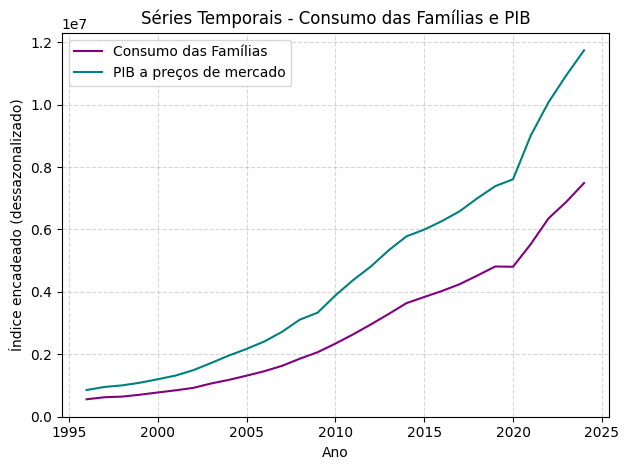

In [70]:
plt.plot(df['Ano'], df['PIB - famílias'], label='Consumo das Famílias', color='purple')
plt.plot(df['Ano'], df['PIB - preços de mercado'], label='PIB a preços de mercado', color='teal')
plt.title('Séries Temporais - Consumo das Famílias e PIB')
plt.xlabel('Ano')
plt.ylabel('Índice encadeado (dessazonalizado)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gráfico mostra as séries temporais do Consumo das Famílias e do PIB a preços de mercado, ambas medidas pelo índice encadeado dessazonalizado, entre 1996 e 2024. É possível observar que ambas as séries apresentam uma tendência crescente ao longo do tempo, refletindo o crescimento econômico e do poder de consumo no país ao longo dos anos.

Contudo, o PIB cresce em um ritmo mais acelerado que o consumo das famílias, o que pode indicar:

um aumento proporcionalmente maior de outros componentes do PIB, como investimentos, gastos do governo ou exportações líquidas;

ou ainda que a participação relativa do consumo das famílias no PIB tenha diminuído ao longo do período.

Além disso, é possível identificar uma queda ou estagnação por volta de 2020, possivelmente associada aos efeitos da pandemia de COVID-19 sobre a atividade econômica. Após esse período, as duas séries retomam a trajetória de crescimento, embora o PIB pareça crescer de forma mais acentuada.

Portanto, embora as duas séries se movam na mesma direção ao longo do tempo, o PIB apresenta maior magnitude e aceleração, sugerindo uma relação positiva, porém com dinâmicas próprias para cada variável.

### b) Agora faça o seguinte: Aplique o filtro HP (Hodrick-Prescott) nas duas séries. 

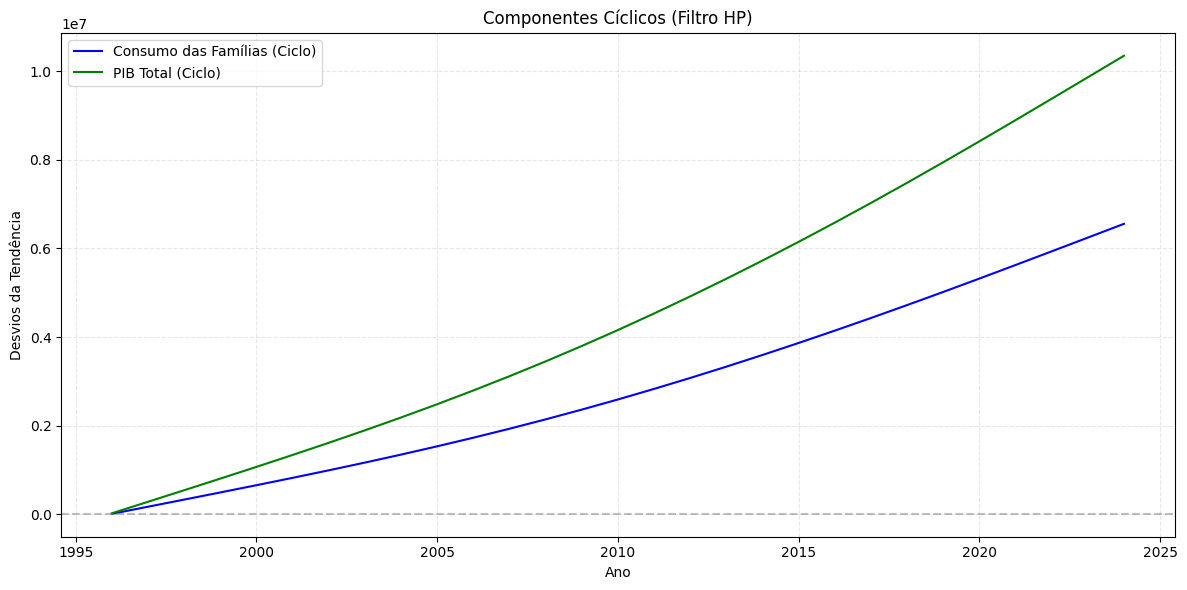

In [73]:
# Aplicando o filtro HP na série "PIB - famílias" (Consumo das Famílias)
cf_trend, cf_cycle = hpfilter(df["PIB - famílias"], lamb=1600)

# Aplicando o filtro HP na série "PIB - preços de mercado" (PIB total)
pib_trend, pib_cycle = hpfilter(df["PIB - preços de mercado"], lamb=1600)

# Adicionando os resultados ao DataFrame
df["Consumo_Tendência"] = cf_trend
df["Consumo_Cíclico"] = cf_cycle
df["PIB_Tendência"] = pib_trend
df["PIB_Cíclico"] = pib_cycle

# Gráfico com os componentes cíclicos
plt.figure(figsize=(12, 6))
plt.plot(df["Ano"], df["Consumo_Cíclico"], label="Consumo das Famílias (Ciclo)", color="blue")
plt.plot(df["Ano"], df["PIB_Cíclico"], label="PIB Total (Ciclo)", color="green")
plt.axhline(0, linestyle="--", color="gray", alpha=0.5)
plt.title("Componentes Cíclicos (Filtro HP)")
plt.xlabel("Ano")
plt.ylabel("Desvios da Tendência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [75]:
# Calculando o desvio padrão dos componentes cíclicos
std_consumo = df["Consumo_Cíclico"].std()
std_pib = df["PIB_Cíclico"].std()

print("Desvio padrão do ciclo do Consumo das Famílias:", round(std_consumo, 2))
print("Desvio padrão do ciclo do PIB:", round(std_pib, 2))

Desvio padrão do ciclo do Consumo das Famílias: 1999295.75
Desvio padrão do ciclo do PIB: 3148206.99


In [78]:
print("\n--- b) Comentário sobre a volatilidade das séries ---")
if std_pib > std_consumo:
    print(f"O componente cíclico do PIB (desvio padrão = {std_pib:.4f}) é MAIS volátil que o componente cíclico do Consumo das Famílias (desvio padrão = {std_consumo:.4f}).")
    print("Este é um resultado amplamente documentado na literatura macroeconômica. O consumo é geralmente considerado mais 'suave' (menos volátil) do que o PIB.")
    print("Isso ocorre porque as famílias tendem a suavizar seu consumo ao longo do tempo, utilizando poupança e crédito para mitigar o impacto de flutuações temporárias na renda.")
elif std_consumo > std_pib:
    print(f"O componente cíclico do Consumo das Famílias (desvio padrão = {std_consumo:.4f}) é MAIS volátil que o componente cíclico do PIB (desvio padrão = {std_pib:.4f}).")
    print("Este seria um resultado menos comum e poderia indicar características específicas do período analisado ou da economia em questão (ou ser um artefato dos dados simulados).")
else:
    print(f"Os componentes cíclicos do Consumo e do PIB apresentam volatilidade muito similar (Consumo: {std_consumo:.4f}, PIB: {std_pib:.4f}).")



--- b) Comentário sobre a volatilidade das séries ---
O componente cíclico do PIB (desvio padrão = 3148206.9936) é MAIS volátil que o componente cíclico do Consumo das Famílias (desvio padrão = 1999295.7539).
Este é um resultado amplamente documentado na literatura macroeconômica. O consumo é geralmente considerado mais 'suave' (menos volátil) do que o PIB.
Isso ocorre porque as famílias tendem a suavizar seu consumo ao longo do tempo, utilizando poupança e crédito para mitigar o impacto de flutuações temporárias na renda.


Após aplicar o filtro de Hodrick-Prescott e calcular o desvio padrão das componentes cíclicas, observei que o ciclo do PIB apresenta uma volatilidade maior (≈ 3,15 milhões) do que o ciclo do consumo das famílias (≈ 2 milhões). Isso indica que, ao longo do tempo, o consumo das famílias tende a oscilar menos do que o PIB, funcionando como uma variável mais estável na economia. Essa estabilidade pode estar ligada ao fato de que o consumo responde de forma mais lenta a choques, enquanto o PIB incorpora flutuações mais intensas oriundas de investimentos, exportações e gastos governamentais.